# 6.6 Sourcing & Analyzing Time-Series Data

### Import Libraries
### Import Data
### Clean Data
#### Update data type
#### Create subset
#### Plot data
### Time-Series Analysis: Decomposition
### Test for Stationarity

## Import Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear

## Import Data

In [2]:
# Path

path = 'C:/Users/micky/OneDrive/Documents/Data Analytics Course/Data Immersion/Achievement 6'

In [3]:
# Import citbike_clean

cb_df = pd.read_csv(os.path.join(path, 'Citibike Project', 'Data', 'citibike_filtered_clean.csv'))

## Clean Data

### Updated data type

In [4]:
# Define data types for column start_date and end_date

cb_df['start_date'] = cb_df['start_date'].astype('datetime64')
cb_df['end_date'] = cb_df['end_date'].astype('datetime64')

In [5]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47912 entries, 0 to 47911
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               47912 non-null  int64         
 1   day_of_week              47912 non-null  object        
 2   start_hour               47912 non-null  int64         
 3   start_station_id         47912 non-null  int64         
 4   start_station_name       47912 non-null  object        
 5   start_station_latitude   47912 non-null  float64       
 6   start_station_longitude  47912 non-null  float64       
 7   end_station_id           47912 non-null  int64         
 8   end_station_name         47912 non-null  object        
 9   end_station_latitude     47912 non-null  float64       
 10  end_station_longitude    47912 non-null  float64       
 11  trip_duration            47912 non-null  int64         
 12  subscriber               47912 n

### Create subset

In [6]:
# Create subset for start_date count

sdcount_df = cb_df.groupby( cb_df['start_date'].dt.date)['start_date'].count()

In [7]:
sdcount_df

start_date
2013-09-01    1103
2013-09-02     977
2013-09-03    1477
2013-09-04    1698
2013-09-05    1566
2013-09-06    1647
2013-09-07    1501
2013-09-08    1482
2013-09-09    1594
2013-09-10    1743
2013-09-11    1727
2013-09-12    1475
2013-09-13    1774
2013-09-14    1479
2013-09-15    1521
2013-09-16    1422
2013-09-17    1774
2013-09-18    1784
2013-09-19    1751
2013-09-20    1930
2013-09-21    1502
2013-09-22    1349
2013-09-23    1664
2013-09-24    1827
2013-09-25    1774
2013-09-26    1857
2013-09-27    1696
2013-09-28    1631
2013-09-29    1425
2013-09-30    1762
Name: start_date, dtype: int64

In [8]:
# Subset for average trip duration by day

duration_day = cb_df.groupby('start_date')['trip_duration'].mean()

In [9]:
duration_day

start_date
2013-09-01    884.620127
2013-09-02    796.931423
2013-09-03    736.243737
2013-09-04    778.995878
2013-09-05    772.941252
2013-09-06    747.816029
2013-09-07    836.145237
2013-09-08    837.953441
2013-09-09    760.531995
2013-09-10    729.407344
2013-09-11    723.171975
2013-09-12    714.053559
2013-09-13    725.191657
2013-09-14    817.421907
2013-09-15    826.983563
2013-09-16    720.524613
2013-09-17    727.209696
2013-09-18    732.920964
2013-09-19    725.436893
2013-09-20    749.479275
2013-09-21    811.200399
2013-09-22    816.760563
2013-09-23    749.719952
2013-09-24    728.085386
2013-09-25    750.315107
2013-09-26    730.275175
2013-09-27    756.698703
2013-09-28    843.755365
2013-09-29    815.199298
2013-09-30    742.769580
Name: trip_duration, dtype: float64

In [10]:
# Combine results

result = pd.DataFrame({'date': sdcount_df.index, 'ride_count': sdcount_df.values, 'avg_duration': duration_day.values})

In [11]:
result

,date,ride_count,avg_duration
0,2013-09-01,1103,884.620127
1,2013-09-02,977,796.931423
2,2013-09-03,1477,736.243737
3,2013-09-04,1698,778.995878
4,2013-09-05,1566,772.941252
5,2013-09-06,1647,747.816029
6,2013-09-07,1501,836.145237
7,2013-09-08,1482,837.953441
8,2013-09-09,1594,760.531995
9,2013-09-10,1743,729.407344


In [12]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [13]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,1103,884.620127
2013-09-02,977,796.931423
2013-09-03,1477,736.243737
2013-09-04,1698,778.995878
2013-09-05,1566,772.941252


### Plot data

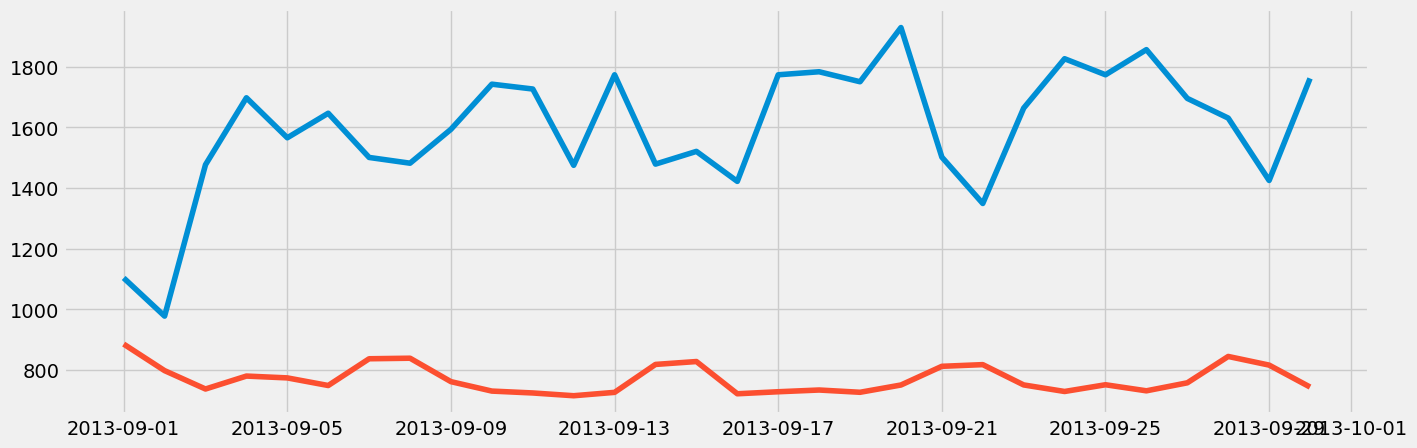

In [14]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(result)

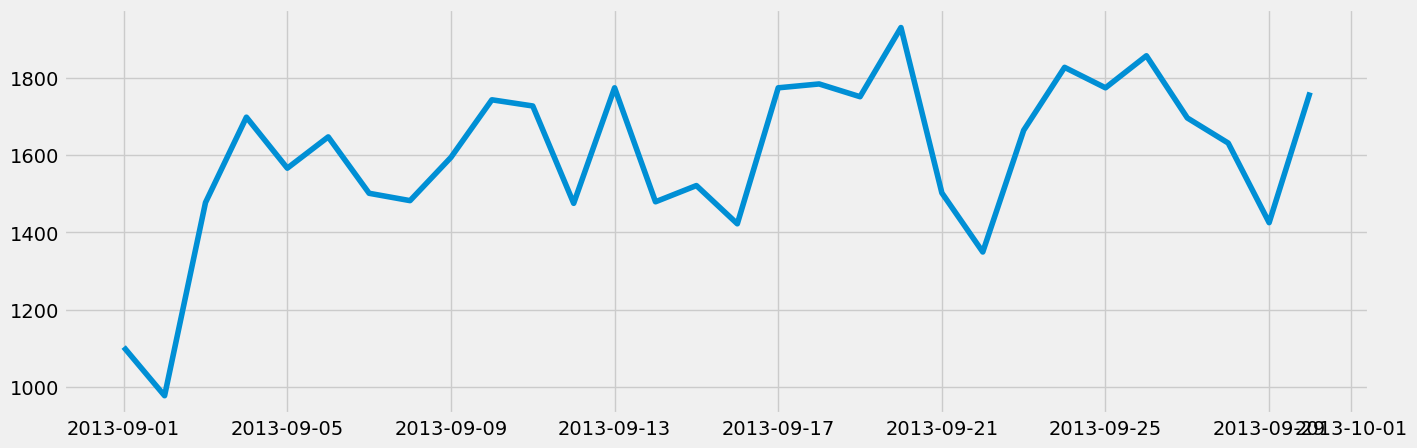

In [15]:
# Plot the sdcount_df data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sdcount_df)

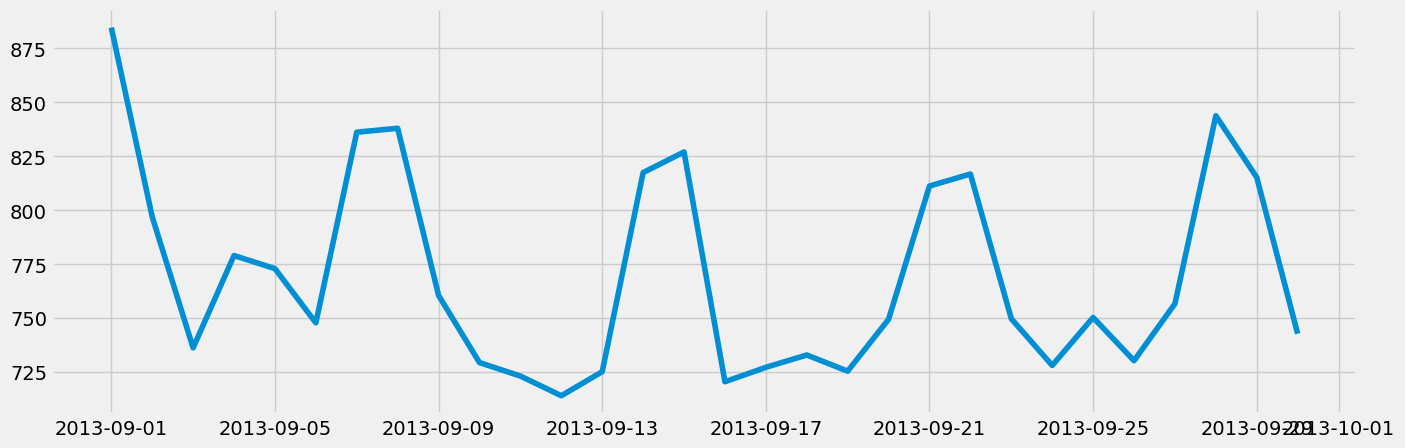

In [16]:
# Plot the duration_day data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(duration_day)

## Time-Series Analysis: Decomposition

In [17]:
result

,ride_count,avg_duration
datetime,,
2013-09-01,1103,884.620127
2013-09-02,977,796.931423
2013-09-03,1477,736.243737
2013-09-04,1698,778.995878
2013-09-05,1566,772.941252
2013-09-06,1647,747.816029
2013-09-07,1501,836.145237
2013-09-08,1482,837.953441
2013-09-09,1594,760.531995


In [18]:
# Drop avg_duration

column_to_drop = 'avg_duration'

In [19]:
result_1 = result.drop(column_to_drop, axis=1)

In [20]:
result_1

,ride_count
datetime,
2013-09-01,1103
2013-09-02,977
2013-09-03,1477
2013-09-04,1698
2013-09-05,1566
2013-09-06,1647
2013-09-07,1501
2013-09-08,1482
2013-09-09,1594


In [21]:
# Reset index so that you can use the "Date" column as a filter

result_1 = result_1.reset_index()

In [22]:
result_1

,datetime,ride_count
0,2013-09-01,1103
1,2013-09-02,977
2,2013-09-03,1477
3,2013-09-04,1698
4,2013-09-05,1566
5,2013-09-06,1647
6,2013-09-07,1501
7,2013-09-08,1482
8,2013-09-09,1594
9,2013-09-10,1743


In [23]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 608.0 bytes


In [24]:
# Create time_series

time_series = result_1['ride_count']

In [25]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [26]:
result_1.set_index('datetime', inplace=True)

In [27]:
result_1.index.freq = 'D'

In [28]:
time_series = result_1['ride_count']

In [29]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

In [30]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

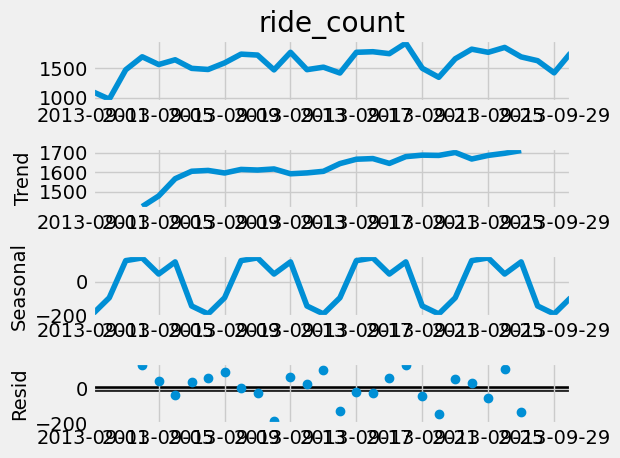

In [31]:
# Plot the separate components

decomposition.plot()
plt.show()

##### The level adn trend are different which means the data needs smoothing.
##### The trend is increasing which means the number of riders are increasing monthly.
##### The data does show some seasonality with some noise.

## Testing for Stationarity

In [32]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.680641
p-value                         0.077449
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


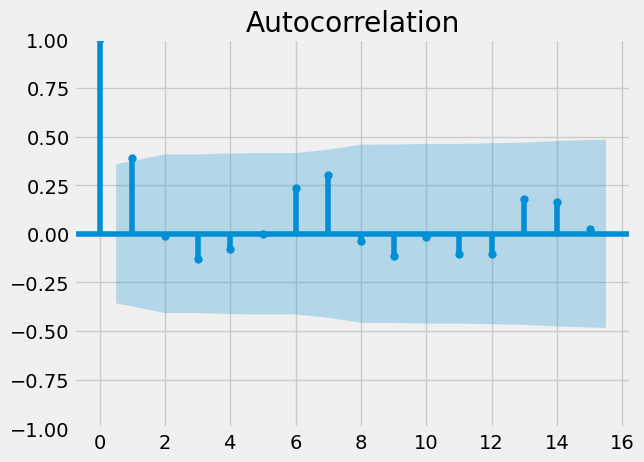

In [33]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

### Stationarizing the ride_count by date data

In [34]:
# Create data_diff

data_diff = result_1 - result_1.shift(1)

In [35]:
# Remove missing values

data_diff.dropna(inplace = True)

In [36]:
data_diff.head()

,ride_count
datetime,
2013-09-02,-126.0
2013-09-03,500.0
2013-09-04,221.0
2013-09-05,-132.0
2013-09-06,81.0


In [37]:
data_diff.columns

Index(['ride_count'], dtype='object')

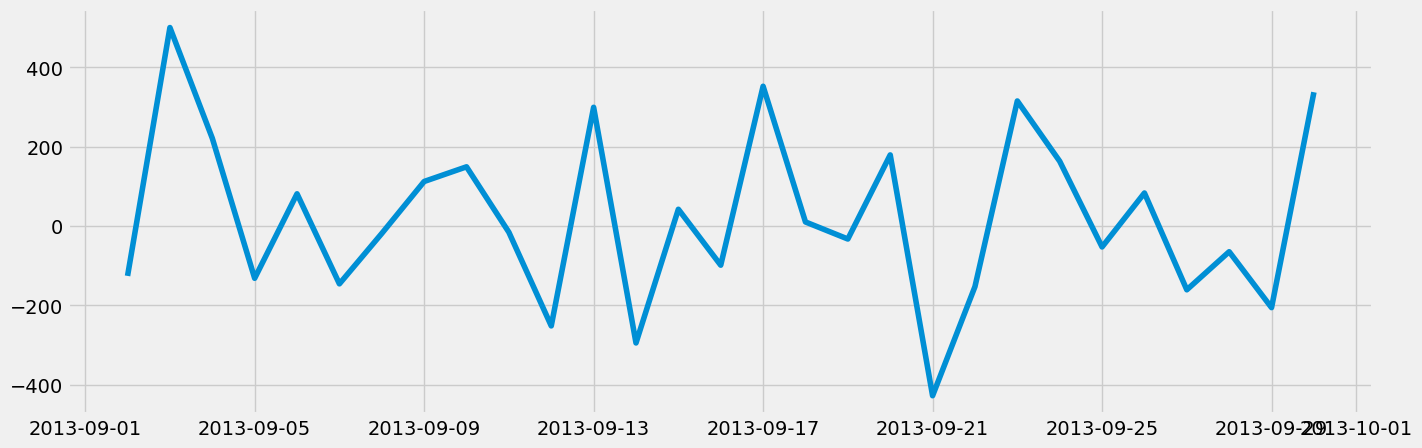

In [38]:
# Check time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [39]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.784703
p-value                         0.000058
Number of Lags Used             5.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


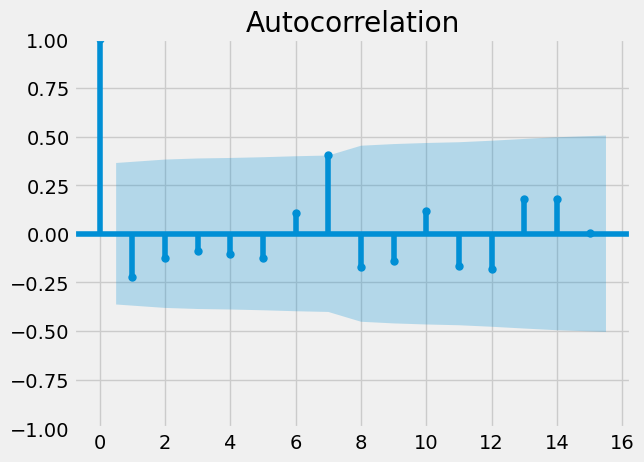

In [40]:
plot_acf(data_diff)
plt.show()